In [3]:
import numpy as np # 기초 수학 연산 및 행렬계산
import pandas as pd # 데이터프레임 사용
from sklearn import datasets # iris와 같은 내장 데이터 사용

### 데이터 사이언스 스쿨, 테디노트 참고하여 작성

##### 참고: https://wp.me/P6W2qc-7jB, https://teddylee777.github.io/scikit-learn/scikit-learn-dataset
- 목표
    - 어떤 품종인지 구분해 놓은 측정 데이터를 이용
    - 새로 채집한 붓꽃의 품종을 예측하는 머신러닝 모델 만들기

- 지도학습
    - 붓꽃의 품종을 정확하게 분류한 데이터를 가지고 있음

- 분류문제
    - 몇 가지 선택사항(붓꽃의 품종) 중 하나를 선택하는 문제

- 클래스 (class)
    - 출력될 수 있는 값(붓꽃의 종류)
    - 데이터 셋에 있는 붓꽃 데이터는 모두 세 클래스(setosa, versicolor, virginica) 중 하나

- 레이블 (label)
    - 데이터 포인트 하나(붓꽃 하나)에 대한 기대 출력은 꽃의 품종이 됨
        - 데이터 포인트에 대한 출력, 즉 품종을 레이블이라함

##### 사이킷런 데이터 프레임 참고 자료
- https://ariz1623.tistory.com/199
- https://seol8118.github.io/scikit-learn/ml-definitive-guide-ch02-v03/#
- https://teddylee777.github.io/scikit-learn/scikit-learn-dataset

##### 1. 데이터 불러오기

In [6]:
# DESCR 속성으로 정보 확인하기
from sklearn.datasets import load_iris # iris 데이터 불러오기 (scikit-learn의 모듈에 포함)
iris = load_iris() # load_iris가 반환한 iris 객체는 파이썬의 dict와 유사한 bunch 클래스의 객체
print(iris.DESCR) # iris 데이터 정보 확인하기

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

##### 2. Feature 데이터 (X)

In [7]:
# 데이터 값 조회하기 - data 키로 접근
features = iris['data'] # feature data는 data 키로 접근하여 가져올 수 있다.

In [8]:
features[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [9]:
# feature data 이름 확인하기
feature_names = iris['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

##### 3. Label 데이터 (Y)

In [10]:
# label data 확인하기 - target
labels = iris['target']
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
# label data 이름 확인하기
target_names = iris['target_names']
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

##### 4. 데이터셋을 DataFrame으로 변환 - Pandas로 데이터 살펴보기

In [12]:
# data와 feature_names 키로 가져온 데이터를 활용하여 데이터 프레임 만들기 1
import pandas as pd
df = pd.DataFrame(features, columns=feature_names) 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
# data와 feature_names 키로 가져온 데이터를 활용하여 데이터 프레임 만들기 2
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
# target 데이터를 새로운 컬럼을 추가
df['target'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


##### 5. 로드한 DataFrame 시각화

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


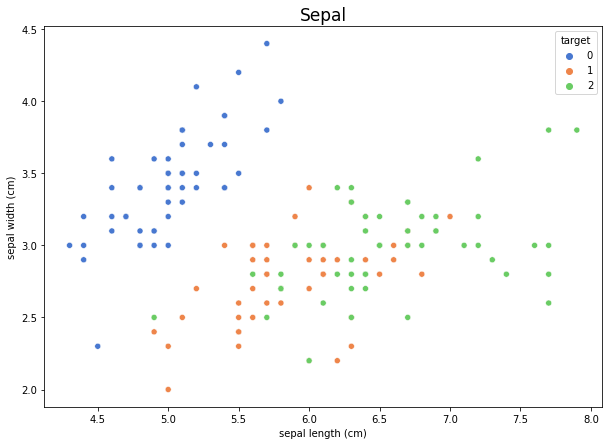

In [18]:
plt.figure(figsize=(10,7))
sns.scatterplot(df.iloc[:, 0], df.iloc[:, 1], hue=df['target'], palette='muted')
plt.title('Sepal', fontsize=17)
plt.show()

- 개념 다시 살펴보기
    - matplotlib
    - seaborn
    - iloc
    - hue

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


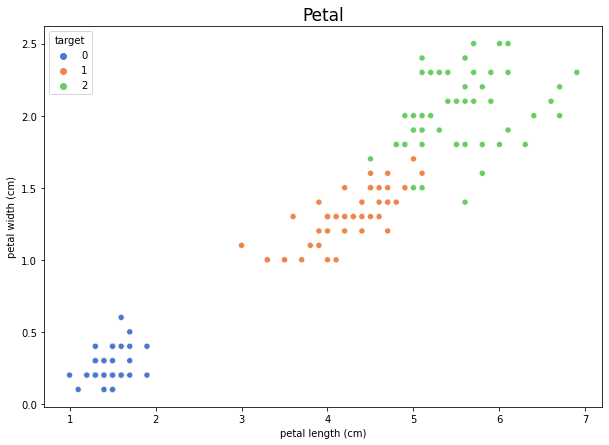

In [19]:
# Petal의 길이 넓이에 따른 꽃의 종류가 어떻게 다르게 나오는지 살펴보기
plt.figure(figsize=(10,7))
sns.scatterplot(df.iloc[:, 2], df.iloc[:, 3], hue=df['target'], palette='muted')
plt.title('Petal', fontsize=17)
plt.show()

##### 6. 데이터분할 (train_test_split)
- 학습과 검증 (테스트)을 나누어 주는 역할
